# 고객구매데이터 군집분석

In [2]:
import pandas as pd 
df = pd.read_excel('CustomerDataSet.xls')
df

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435
5,10,34,17,6,2896
6,11,40,20,8,2869
7,12,40,8,2,1236
8,14,9,9,8,2435
9,15,36,7,2,1764


In [39]:
# 데이터 복사본
df2 = df.copy()

# 거리계산을 위해 정규화 전처리 실행
from sklearn.preprocessing import MinMaxScaler
df2[['ItemsBought', 'ItemsReturned']] = MinMaxScaler().fit_transform(df2[['ItemsBought', 'ItemsReturned']])

4개 그룹으로 나누면 좋을듯


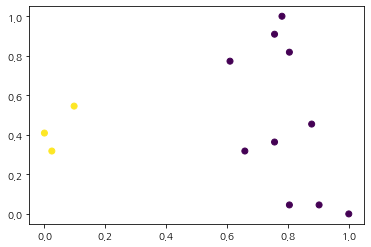

In [40]:
import matplotlib.pyplot as plt

# 군집분석
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
pred = model.fit_predict(df2[['ItemsBought', 'ItemsReturned']])

plt.scatter(
    df2['ItemsBought'], # x 
    df2['ItemsReturned'], # y
    c=pred # color : 같은 값끼리 같은 색을 가짐
    )

print('4개 그룹으로 나누면 좋을듯')

4개 그룹으로 나눈 결과


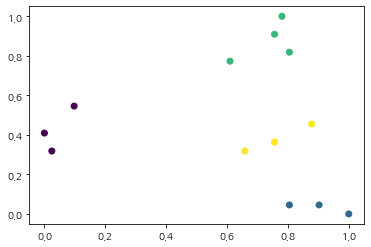

In [21]:
model = KMeans(n_clusters=4)
pred = model.fit_predict(pd2[['ItemsBought', 'ItemsReturned']])

plt.scatter(
    pd2['ItemsBought'], # x 
    pd2['ItemsReturned'], # y
    c=pred
    )

print('4개 그룹으로 나눈 결과')

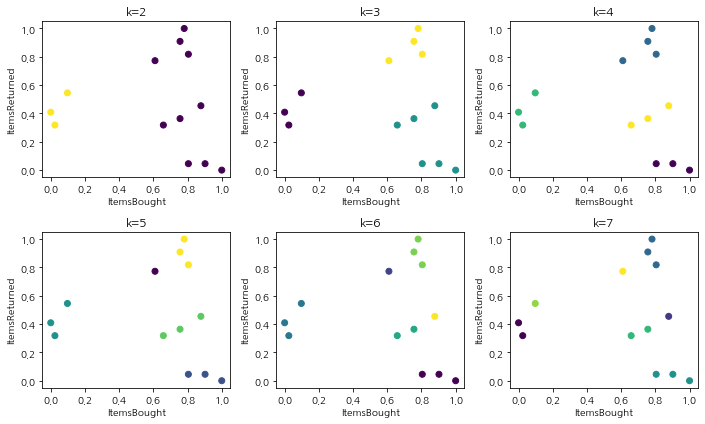

In [41]:
plt.figure(figsize=(10,6))

for k in range(2,8):
    model = KMeans(n_clusters=k)
    pred = model.fit_predict(pd2[['ItemsBought', 'ItemsReturned']])
    

    plt.subplot(2,3,k-1)     # 2행 3열 그래프
    plt.tight_layout() # 그래프들끼리 겹치지 않고 적당한 간격을 둠
    
    plt.title(f'k={k}')
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')

    plt.scatter(
        df2['ItemsBought'], # x 
        df2['ItemsReturned'], # y
        c=pred # color : 같은 값끼리 같은 색을 가짐
        )

In [42]:
list(df2.itertuples())

[Pandas(Index=0, _1=4, ItemsBought=0.878048780487805, ItemsReturned=0.4545454545454546, ZipCode=2, Product=1365),
 Pandas(Index=1, _1=5, ItemsBought=0.8048780487804879, ItemsReturned=0.8181818181818182, ZipCode=5, Product=2764),
 Pandas(Index=2, _1=6, ItemsBought=1.0, ItemsReturned=0.0, ZipCode=1, Product=1343),
 Pandas(Index=3, _1=8, ItemsBought=0.0975609756097561, ItemsReturned=0.5454545454545454, ZipCode=4, Product=2435),
 Pandas(Index=4, _1=9, ItemsBought=0.02439024390243902, ItemsReturned=0.3181818181818182, ZipCode=3, Product=2435),
 Pandas(Index=5, _1=10, ItemsBought=0.6097560975609757, ItemsReturned=0.7727272727272727, ZipCode=6, Product=2896),
 Pandas(Index=6, _1=11, ItemsBought=0.7560975609756098, ItemsReturned=0.9090909090909092, ZipCode=8, Product=2869),
 Pandas(Index=7, _1=12, ItemsBought=0.7560975609756098, ItemsReturned=0.36363636363636365, ZipCode=2, Product=1236),
 Pandas(Index=8, _1=14, ItemsBought=0.0, ItemsReturned=0.4090909090909091, ZipCode=8, Product=2435),
 Pand

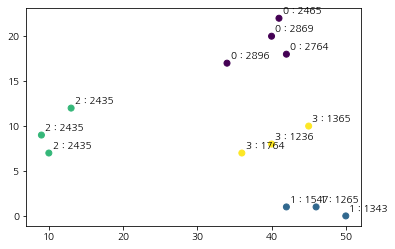

In [50]:
model = KMeans(n_clusters=4)
pred = model.fit_predict(df2[['ItemsBought', 'ItemsReturned']])

plt.scatter(
    df['ItemsBought'], # x 
    df['ItemsReturned'], # y
    c=pred
    )


# 각 데이터에 제품번호 출력
for index, c_id, bought, returned, zipcode, product in df.itertuples():
    # 주석 달기
    plt.annotate(f'{pred[index]} : {product}', (bought+0.5, returned+0.5)) # +0.5하면 점에 글자가 겹쳐지지 않음
plt.show()
